In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# It creates a dataset with groups of points (blobs) that are useful for testing clustering algorithms like K-Means, DBSCAN, BIRCH, etc.
from sklearn.datasets import make_blobs

In [102]:
# n_features - we can take multiple feature, but since we need to visualize we are taking only 2 features
X,Y = make_blobs(n_samples=1000, centers=4, n_features=2)

In [103]:
# we are using Unsupervised learning so we will take only X - Data
X

array([[-4.31247517,  9.8202099 ],
       [-2.56872306,  9.90120525],
       [ 2.3809921 , -7.49774757],
       ...,
       [ 3.51098764, -8.49669306],
       [ 8.60784647, -6.54271367],
       [-7.93475596,  1.19959709]], shape=(1000, 2))

<Axes: >

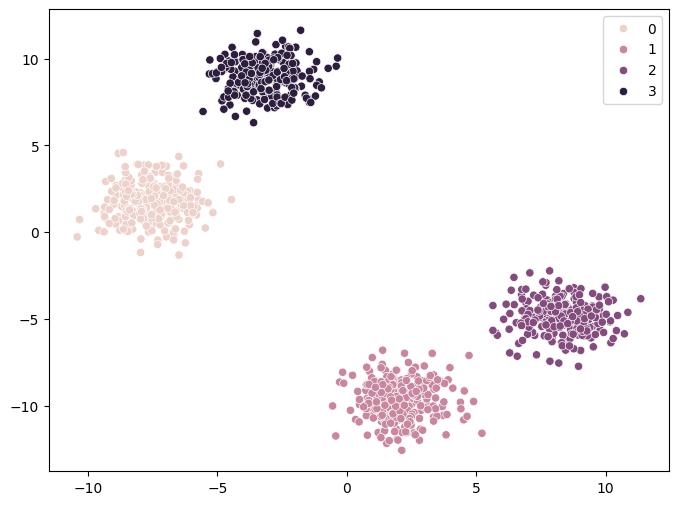

In [104]:
# we gave 3 centroids
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

In [105]:
#Standardize-- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [108]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
from sklearn.cluster import KMeans

In [110]:
# Elbow method to select K-value
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    # inertia_ (WCSS) measures how tightly grouped the clusters are (lower is better)
    wcss.append(kmeans.inertia_)

In [111]:
# so you get your wcss value and initialy it will be high and at certain point it decreases and becomes stagnant forming Elbow Method
wcss

[1400.0000000000002,
 304.2409022407546,
 167.99645478324493,
 33.5875135532927,
 30.554630850896746,
 27.561215369417983,
 25.881517033364446,
 21.98006705603037,
 24.00783778613765,
 18.2722254097961,
 16.24229201509234,
 14.713505408430493,
 14.24043656032121,
 13.01755732017911]

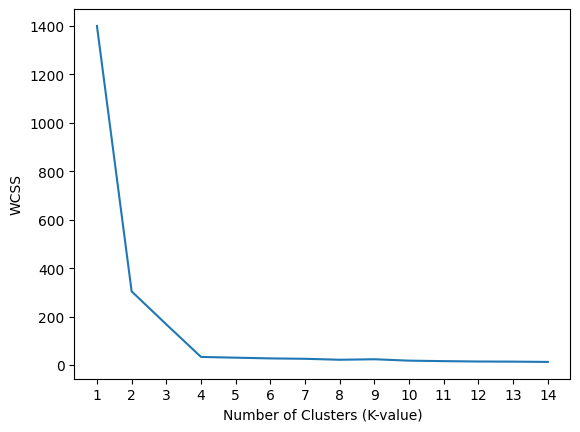

In [112]:
plt.plot(range(1, 15), wcss)
plt.xticks(range(1,15))
plt.xlabel("Number of Clusters (K-value)")
plt.ylabel("WCSS")
plt.show()

In [121]:
kmeans = KMeans(n_clusters=4, init="k-means++")

In [114]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0,

In [115]:
Y_pred = kmeans.predict(X_test_scaled)

In [116]:
Y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1,
       2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2,
       1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2], d

<Axes: >

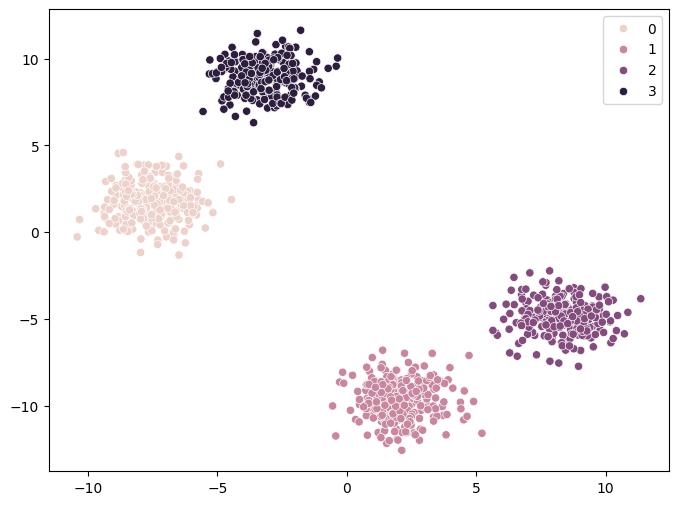

In [122]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

### validating k-value
1. **kneelocator** (kneed library) - This code automates finding the optimal K-value for K-Means using the KneeLocator library. It confirms whether the Elbow Method's visual estimate matches the calculated K-value.
2. **silhouette scoring**

In [ ]:
# kneelocator
# !pip install kneed

In [118]:
from kneed import KneeLocator

In [119]:
# range(1,15): The K-values from 1 to 14.
# wcss: The WCSS values stored from the Elbow Method.
# curve="convex": Assumes an elbow shape (which is typical for WCSS).
# direction="decreasing": Since WCSS decreases as K increases.
kn_lc = KneeLocator(range(1,15), wcss, curve="convex", direction="decreasing")

In [124]:
# This returns the best K where the elbow is detected. so this confirms that the kneelocator macthes k-value in Elbow Method an we can use this k-value
kn_lc.elbow

np.int64(4)

In [125]:
# silhouette scoring
from sklearn.metrics import silhouette_score

In [126]:
# Initialize an empty list to store Silhouette Scores
silhouette_coefficients = []

# Loop through different K values (from 2 to 7)
for k in range(2,8):
    # Create and fit the K-Means model
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    # Compute the Silhouette Score
    # silhouette_score(X, labels) measures how well each point fits in its assigned cluster.
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [129]:
silhouette_coefficients

[np.float64(0.7083186723909668),
 np.float64(0.7337648248369606),
 np.float64(0.7778073277692515),
 np.float64(0.6635844784644575),
 np.float64(0.5547927406025609),
 np.float64(0.5557789211425445)]

### **What is `kmeans.labels_`?**  
`kmeans.labels_` is an **array of cluster labels** assigned to each data point after running the **K-Means clustering algorithm**.

---

### **How Does It Work?**  
- When you fit K-Means on a dataset, it **assigns each data point** to one of the **K clusters**.  
- `kmeans.labels_` stores the **cluster index** (e.g., `0, 1, 2, ... K-1`) for each data point.

- `kmeans.labels_` tells **which cluster each point belongs to**.  
- `silhouette_score()` then **measures the separation** between clusters.

#### So here we can see that with Silhouette coeeficient when plotted against k-value. For k-value = 4 the coefficient is very high and then decreases. So this means k-4 is an optimal value for the Kmeans Clustering and we can confidently use this K-value = 4

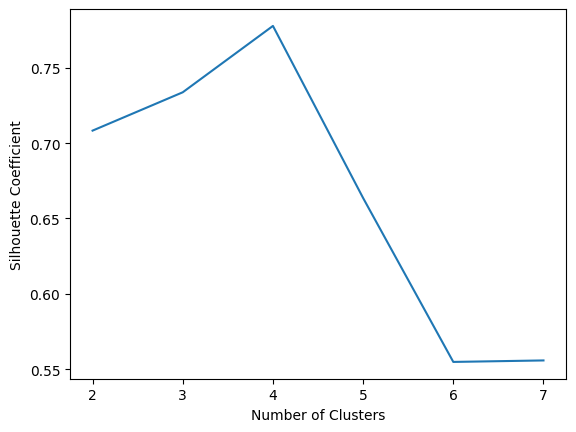

In [130]:
plt.plot(range(2,8), silhouette_coefficients)
plt.xticks(range(2,8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()